In [10]:
import pandas as pd
import numpy as np

# Handling Missing Data
-ignore, missing values or fill data

In [27]:

dict = {'Marks': [100, 90, np.nan, 95],
        'Rank': [1, 2, 4, np.nan],
        'Avg Marks': [np.nan, 40, 80, 98]}

df = pd.DataFrame(dict)
print(df)


   Marks  Rank  Avg Marks
0  100.0   1.0        NaN
1   90.0   2.0       40.0
2    NaN   4.0       80.0
3   95.0   NaN       98.0


In [28]:
df.isnull()

,Marks,Rank,Avg Marks
0,False,False,True
1,False,False,False
2,True,False,False
3,False,True,False


In [29]:
df.fillna(0)

,Marks,Rank,Avg Marks
0,100.0,1.0,0.0
1,90.0,2.0,40.0
2,0.0,4.0,80.0
3,95.0,0.0,98.0


In [30]:
#replace nan value with value next to it
df.fillna(method='bfill')

,Marks,Rank,Avg Marks
0,100.0,1.0,40.0
1,90.0,2.0,40.0
2,95.0,4.0,80.0
3,95.0,NaN,98.0


In [31]:
#replace nan value with value before to it
df.fillna(method='pad')

,Marks,Rank,Avg Marks
0,100.0,1.0,NaN
1,90.0,2.0,40.0
2,90.0,4.0,80.0
3,95.0,4.0,98.0


In [32]:
#average before and after, if no before value-> then keeps nan
df.interpolate(method='linear',limit_direction='forward')

,Marks,Rank,Avg Marks
0,100.0,1.0,NaN
1,90.0,2.0,40.0
2,92.5,4.0,80.0
3,95.0,4.0,98.0


In [33]:
df.dropna()

,Marks,Rank,Avg Marks
1,90.0,2.0,40.0


# Handling Noisy Data
-meaningless data generated due to faulty data collection, data entry errors. Ways:
1. Binning Method:
    a. Works on sorted data
    b. Data is divided into segments of equal size & then various methods are used to complete the task.
    c. Each segment is handled seperately. (ex, by mean/boundary values)
2. Regression: Fit a regression model to the data (linear or nonlinear).Use the regression equation to smooth the data or detect noise (residuals). 
3. Clustering: groups similar data in a cluster. outliers might fall outside the clusters(unpredicted)

| Technique  | Library Used          | Purpose                       |
| ---------- | --------------------- | ----------------------------- |
| Binning    | NumPy, Pandas         | Smoothing groups              |
| Regression | Scikit-learn          | Smooth trend, detect outliers |
| Clustering | Scikit-learn (DBSCAN) | Identify and remove noise     |


## 1. Binning (Smoothing by bin means/medians)
Used to smooth noisy data by grouping it into fixed-size bins.

In [34]:
import numpy as np
import pandas as pd

In [36]:
# Sample noisy data
data = pd.Series([12, 15, 14, 98, 13, 12, 15, 96, 16, 14])

In [38]:
#sort data
sorted_data=data.sort_values().reset_index(drop=True)

In [39]:
#bin into 3 equal-sized parts
bins=np.array_split(sorted_data, 3)

In [40]:
binned_mean=pd.concat([pd.Series([group.mean()]*len(group)) for group in bins])

In [41]:
print("Original:\n", sorted_data.tolist())
print("Smoothed (mean):\n", binned_mean.tolist())

Original:
 [12, 12, 13, 14, 14, 15, 15, 16, 96, 98]
Smoothed (mean):
 [12.75, 12.75, 12.75, 12.75, 14.666666666666666, 14.666666666666666, 14.666666666666666, 70.0, 70.0, 70.0]


In [43]:
binned_median = pd.concat([pd.Series([group.median()] * len(group)) for group in bins])
binned_median.toist()

[12.5, 12.5, 12.5, 12.5, 15.0, 15.0, 15.0, 96.0, 96.0, 96.0]

## 2. Regression
linear regression model to smooth or detect outliers.

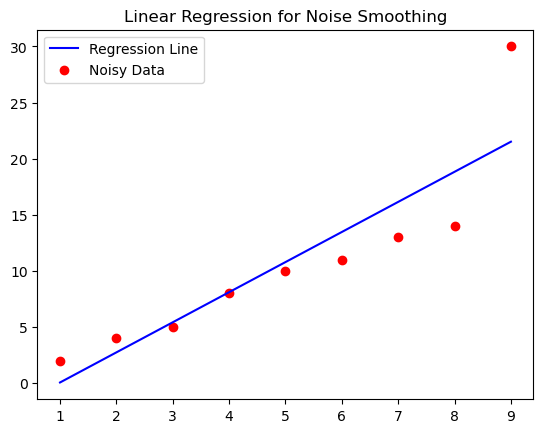

In [45]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data with noise
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1, 1)
y = np.array([2, 4, 5, 8, 10, 11, 13, 14, 30])  # 30 is a noisy point

# Fit regression model
model = LinearRegression()
model.fit(X, y)
predicted = model.predict(X)

# Plot
plt.scatter(X, y, color='red', label='Noisy Data')
plt.plot(X, predicted, color='blue', label='Regression Line')
plt.legend()
plt.title("Linear Regression for Noise Smoothing")
plt.show()


## 3.Clustering
DBSCAN can separate dense clusters from noisy outliers.

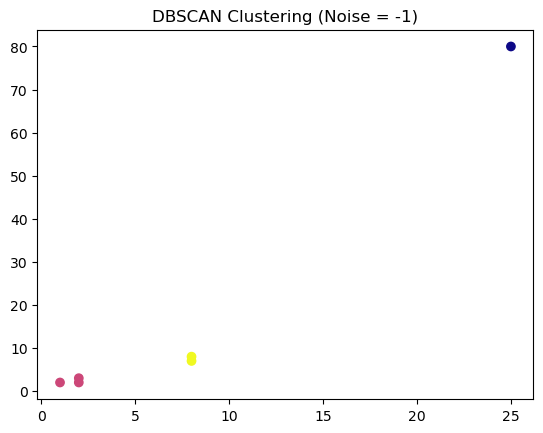

Cluster labels: [ 0  0  0  1  1 -1]


In [46]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Sample 2D data
X = np.array([[1, 2], [2, 2], [2, 3], [8, 7], [8, 8], [25, 80]])  # 25,80 is an outlier

# DBSCAN clustering
db = DBSCAN(eps=3, min_samples=2).fit(X)
labels = db.labels_  # -1 is noise

# Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma')
plt.title("DBSCAN Clustering (Noise = -1)")
plt.show()

print("Cluster labels:", labels)
